## SBDS_Capstone_Proejct_1 - Predict Adults with 50K/yr Income - Data Story

This capstone project is based on dataset called ‘Adult Data Set’ - (http://archive.ics.uci.edu/ml/datasets/Adult) from UCI’s Machine Learning Repository.
This project aims to solve following problems:
1.	Predict whether a person’s income exceed $50K/yr based on the census data
2.	Identify various segments which may exist in the population based on the data collected

a.	As in any good data analysis project, I first plan to do a good deal of EDA (Exploratory Data Analysis) of the dataset. The objective is to thoroughly understand the data and then based on that prepare the data analysis plan/framework.

b.	Based on the EDA, I will identify the key hypothesis which should answer following questions
- Overall income distribution of the population
- Which attributes may have greater influence on determining the income threshold of 50K/yr
- Any other interesting facts



Initial Data Cleanup

The original data is in .data format. This was first converted to .txt, and then to .csv to make it easily readable by Panda

In [445]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [446]:
# I will first load data for US Geo and do an EDA for the same
adult = pd.read_csv('adult_csv.csv')

In [447]:
adult.shape

(32561, 15)

In [448]:
pop = 32561

In [449]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [450]:
adult.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [451]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [452]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


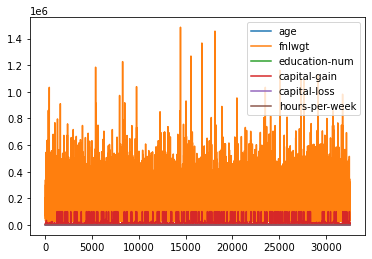

In [453]:
adult.plot()

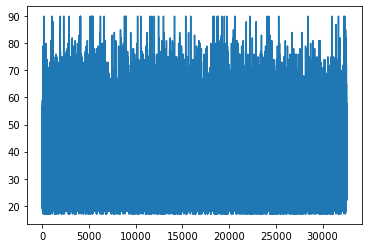

In [454]:
adult.age.plot()

In [455]:
adult['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [456]:
native = adult['native-country'].value_counts()
print(native)

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [457]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Missing Values?

There are no missing values, except native-country columns which has 582 entries with value '?' - for these entries, native-country was probably not known. Considering that the count is quite small compared to the total count (32561), I deided to leave it unchanged so that it can be identified as it's own category in the later stastical analysis.

Outliers:
There are not outliers in the data based on describe methods results

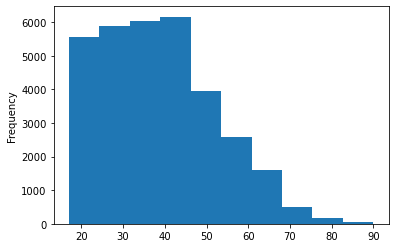

In [458]:
adult.age.plot(kind='hist')

In [459]:
adult['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

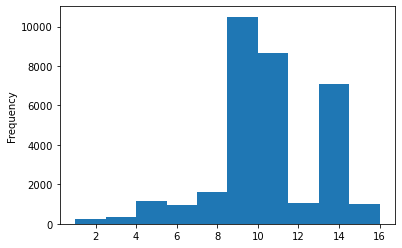

In [460]:
adult['education-num'].plot(kind='hist')

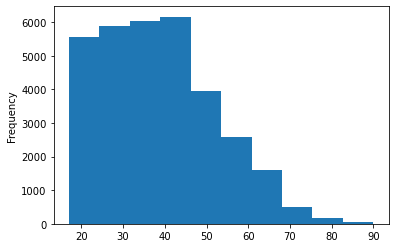

In [461]:
adult.age.plot(kind='hist')

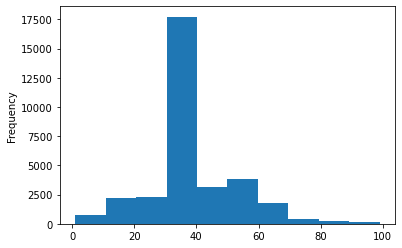

In [462]:
adult['hours-per-week'].plot(kind='hist')

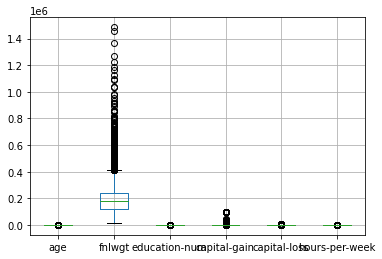

In [463]:
adult.boxplot()

### Column 'fnlwgt' is records of respondent IDs and hence not the real data (this column will dropped later)
The above box-plot cannot be used for EDA since the data is not normalized and as a result Box-plot cannot be displayed in a useful way. I will plot individual columns against each other to get more interpretable results of box-plots.

Also the column
'fnlwgt' values are not real numbers instead they are more of identification values (and hence of no use for quantitative data analysis)

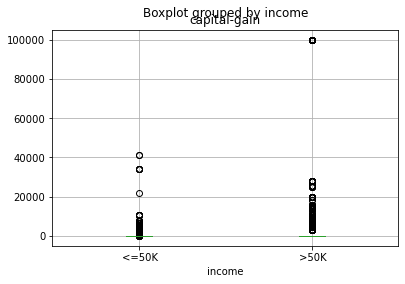

In [464]:
adult.boxplot(column='capital-gain', by='income')

### Outliers?

The capital gain figure of $100000 may appear to be outlier but it is quite possible to have that much of income for some individuals. Similarly, there are a few outliers in the <=50k income group, but they also fall in to the category of valid data/values.

As they say not all outliers are bad data points. Some can be an error, but others are valid values.

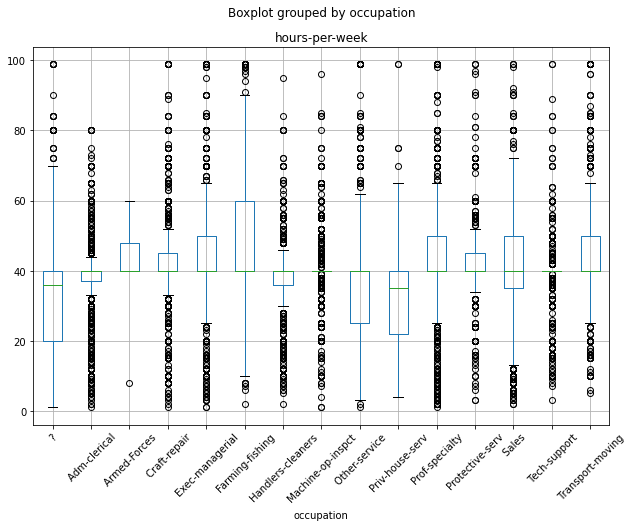

In [465]:
adult.boxplot(column='hours-per-week', by='occupation', figsize=(10,7), rot=45)

### Dropping column 'fnlwgt' from the dataframe
As explained earlier, this column contains the IDs of each reacord and hence cannot be treated as a valid data attribute which can be used in data analysis. Hence we will now drop this data attribute.

In [466]:
adult1 = adult.drop(['fnlwgt'], axis=1)
adult1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Let's do value counts for all the rest of the columns to visually understand data for each of the attributes

In [467]:
age = adult1['age'].value_counts(dropna=False)
print(age)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64


In [468]:
workclass = adult1['workclass'].value_counts(dropna=False)
print(workclass)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


### Missing Values
For 1836 respondents the occupation data is missing, we will chage this later to 'not-known' so that 


In [469]:
education = adult1['education'].value_counts(dropna=False)
print(education)

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


In [470]:
education_num = adult1['education-num'].value_counts(dropna=False)
print(education_num)

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64


In [471]:
marital_status = adult1['marital-status'].value_counts(dropna=False)
print(marital_status)

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64


In [472]:
relationship = adult1['relationship'].value_counts(dropna=False)
print(relationship)

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


In [473]:
occupation = adult1['occupation'].value_counts(dropna=False)
print(occupation)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


In [474]:
race = adult1['race'].value_counts(dropna=False)
print(race)

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


In [475]:
sex = adult1['sex'].value_counts(dropna=False)
print(sex)

 Male      21790
 Female    10771
Name: sex, dtype: int64


In [548]:
capital_gain = adult1['capital-gain'].value_counts(dropna=False)
print(capital_gain)
no_capgain = 29849/ pop * 100
print(no_capgain)

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, Length: 119, dtype: int64
91.67101747489328


#### Majority of the respondents (29,849, 91%) have reported no ($0) capital-gains

In [549]:
capital_loss = adult1['capital-loss'].value_counts(dropna=False)
print(capital_loss)
no_caploss = 31042/pop * 100
print(no_caploss)

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital-loss, Length: 92, dtype: int64
95.33490986149073


#### Majority of the respondents (29,849, 95%) have reported no ($0) capital-loss either

### Considering the fact that most of the respondents in the dataset did not have capital-gain or capital-loss, we may drop these 2 columns from the table later since data from these coolumns does not truly represent the population and in fact can be almost categorized as outliers.

In [478]:
income = adult1['income'].value_counts(dropna=False)
print(income)

 <=50K    24720
 >50K      7841
Name: income, dtype: int64


#### Majority of the population - 24,720 people (76%) falls in the low income, <=50K group, with rest of the population - 7841 people (24%) falling in high income, >50K group

In [479]:
hours = adult1['hours-per-week'].value_counts()
print(hours)

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64


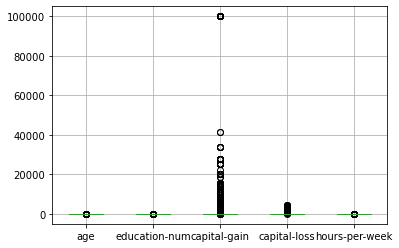

In [480]:
adult1.boxplot()

#### As explained before let's drop capital-gain and capital-loss columns so that plots such as bocplots can be plotted and interpreted more effectively.

In [481]:
adult2 = adult.drop(['fnlwgt', 'capital-gain', 'capital-loss'], axis=1)
adult2.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


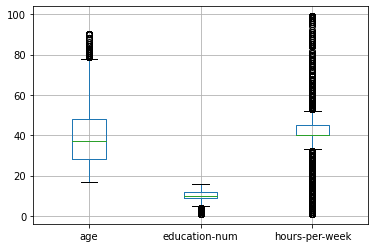

In [482]:
adult2.boxplot()

In [483]:
adult2.describe()

,age,education-num,hours-per-week
count,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456
std,13.640433,2.572720,12.347429
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


In [484]:
adult2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours-per-week  32561 non-null  int64 
 10  native-country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


#### Now let's convert all the non-integer attributes in to categories from objects. This wouold help in reduced usage of memory and also in running advanced statistical and machine learning model.

In [485]:
#create a copy similar to adult2 table
adult3 = adult.drop(['fnlwgt', 'capital-gain', 'capital-loss'], axis=1)
adult3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours-per-week  32561 non-null  int64 
 10  native-country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [486]:
adult3.workclass = adult3.workclass.astype('category')
adult3.workclass.dtype

CategoricalDtype(categories=[' ?', ' Federal-gov', ' Local-gov', ' Never-worked',
                  ' Private', ' Self-emp-inc', ' Self-emp-not-inc',
                  ' State-gov', ' Without-pay'],
                 ordered=False)

In [487]:
adult3.education = adult3.education.astype('category')
adult3['marital-status'] = adult3['marital-status'].astype('category')
adult3.occupation = adult3.occupation.astype('category')
adult3.relationship = adult3.relationship.astype('category')
adult3.race = adult3.race.astype('category')
adult3['native-country'] = adult3['native-country'].astype('category')
#adult3.income = adult3.income.astype('category')

In [488]:
adult3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  category
 5   occupation      32561 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  object  
 9   hours-per-week  32561 non-null  int64   
 10  native-country  32561 non-null  category
 11  income          32561 non-null  object  
dtypes: category(7), int64(3), object(2)
memory usage: 1.5+ MB


#### As you can see above, all the non-integer objects have been converted to 'category' data type and as a result the memory usage reduced from a previous value of 3.0+ MB to 1.2+ MB, a significant reduction indeed (60% reduction)

In [489]:
adult3.describe()

,age,education-num,hours-per-week
count,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456
std,13.640433,2.572720,12.347429
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


In [490]:
adult3.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


age                  AxesSubplot(0.125,0.125;0.227941x0.755)
education-num     AxesSubplot(0.398529,0.125;0.227941x0.755)
hours-per-week    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

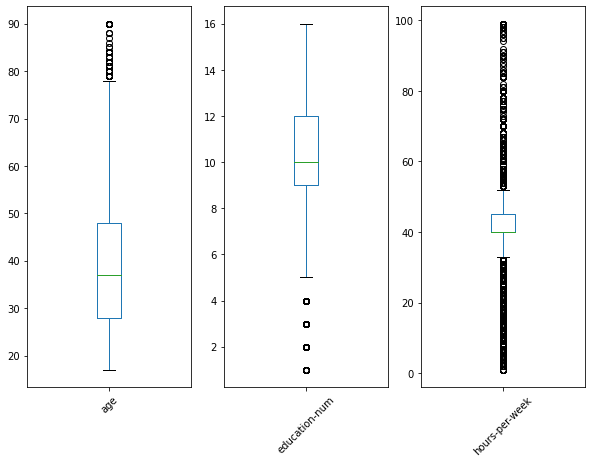

In [491]:
adult3.plot(kind='box', figsize=(10,7), rot=45, subplots=True)

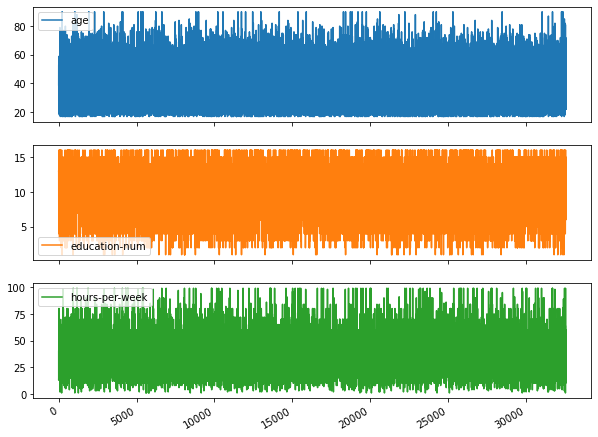

In [492]:
adult3.plot(subplots=True, figsize=(10,8))
plt.show()

No clear pattern emerges


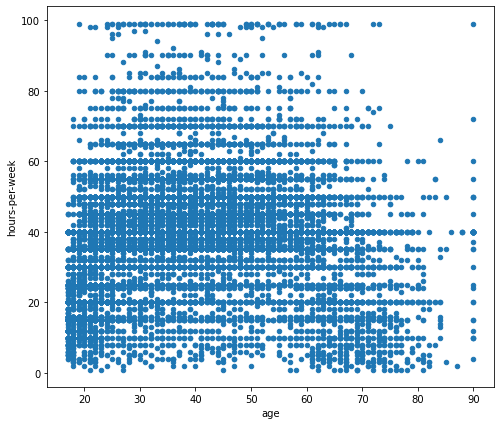

In [493]:
adult3.plot(kind='scatter', x='age', y='hours-per-week',figsize=(8,7))
print("No clear pattern emerges")

No clear pattern emerges


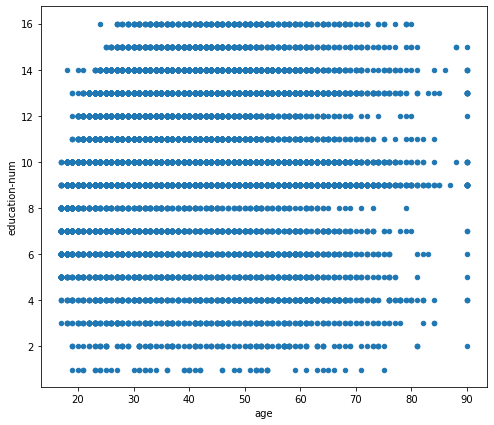

In [494]:
adult3.plot(kind='scatter', x='age', y='education-num',figsize=(8,7))
print("No clear pattern emerges")

### Next we will change the values <=50K and >50K to 0 and 1 repsectively, so that these values can then be utilized easily for EDA and ML modeling later

In [495]:
adult4=adult3.copy()
adult4.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [496]:
replace_map = {'income':{'<=50K' : 0, '>50K' : 1}}
adult4.replace(replace_map, inplace=True, regex=True)
adult4.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [497]:
adult4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  category
 5   occupation      32561 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  object  
 9   hours-per-week  32561 non-null  int64   
 10  native-country  32561 non-null  category
 11  income          32561 non-null  int64   
dtypes: category(7), int64(4), object(1)
memory usage: 1.5+ MB


### Further Numerical and Visual Data Analysis of the 2 income groups

In [498]:
adult4agg1 = adult4.groupby('income')['age'].mean()
adult4agg1.head()

income
0    36.783738
1    44.249841
Name: age, dtype: float64

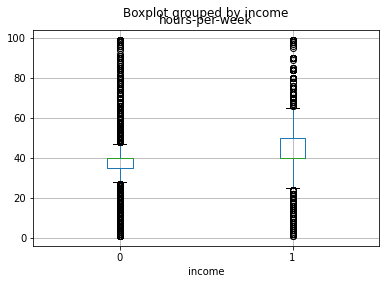

In [500]:
adult4.boxplot(column='hours-per-week', by='income')

### Number of hours clocked by <= 50K and >50K group
The >50K income group clearly has people who are clocking many more hours than people from <=50K income group. The average # of hours are more than 40 hours in high income group vs. an average of less than 40 hours in low income group

In [499]:
adult4agg2 = adult4.groupby('income')['hours-per-week'].mean()
adult4agg2.head()

income
0    38.840210
1    45.473026
Name: hours-per-week, dtype: float64

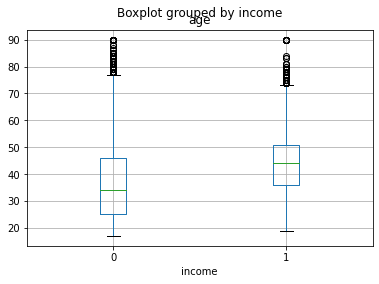

In [501]:
adult4.boxplot(column='age', by='income')

### Age distribution among <= 50K and >50K segments
The >50K income group clearly has people with higher age than people from <=50K income group. The average age is 44.25 years in high income group vis-a-vis average age of 36.87 years in low income group

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

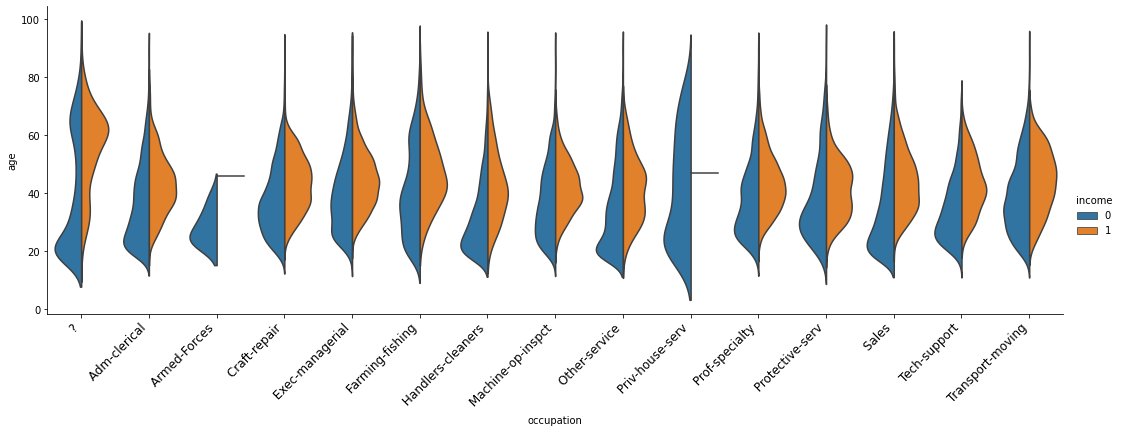

In [536]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='occupation', y='age', hue='income', kind='violin', inner=None, split=True, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### The overall trend of age difference between higher income group and lower income group continues across various occupation categories as well

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

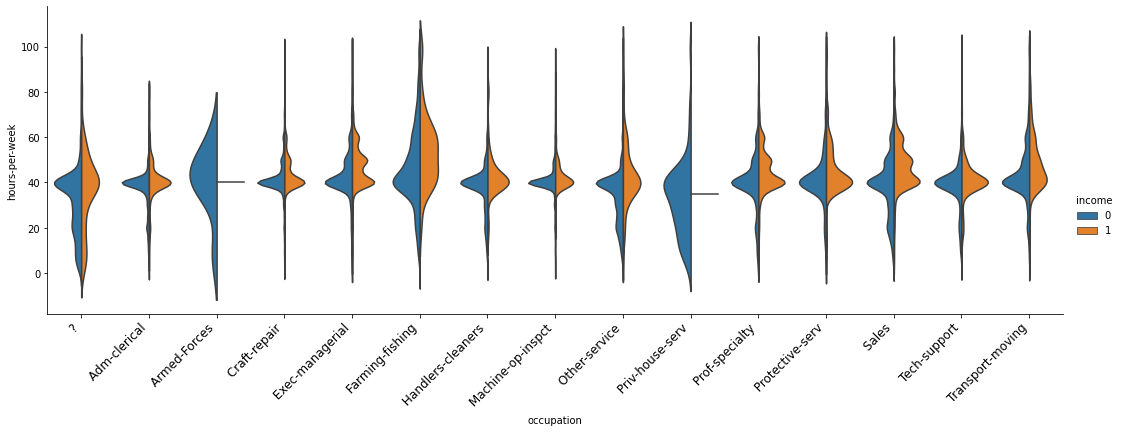

In [535]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='occupation', y='hours-per-week', hue='income', kind='violin', inner=None, split=True, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### The overall trend of 'hours worked per week' difference between higher income group and lower income group continues across various occupation categories as well

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

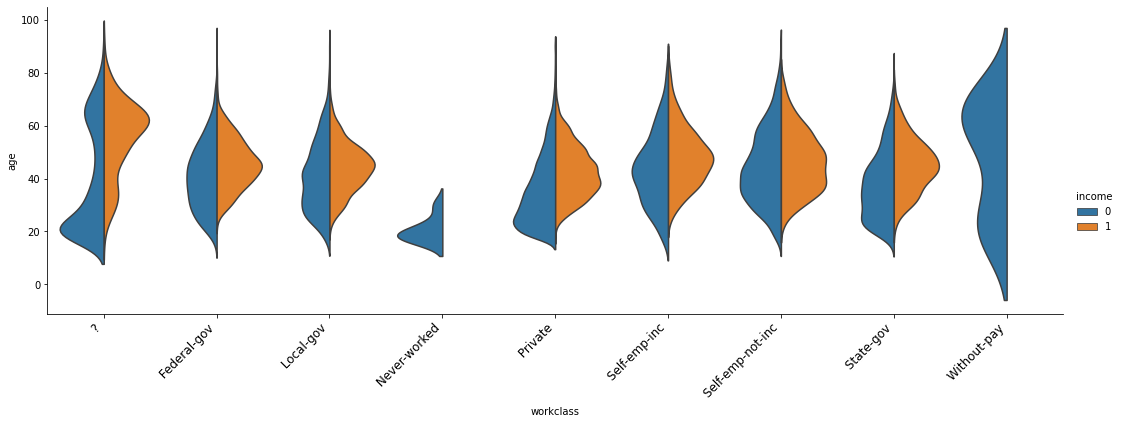

In [540]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='workclass', y='age', hue='income', kind='violin', inner=None, split=True, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Across the workclassses, for higher income group, the age is more skewed towards higher values. The overall age difference between low income group and high income group seems to be substantial. Lower income group is more concentrated between 20 to 40 years age block vs. higher income group which is more concentrated betweem 40 to 60 age block 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

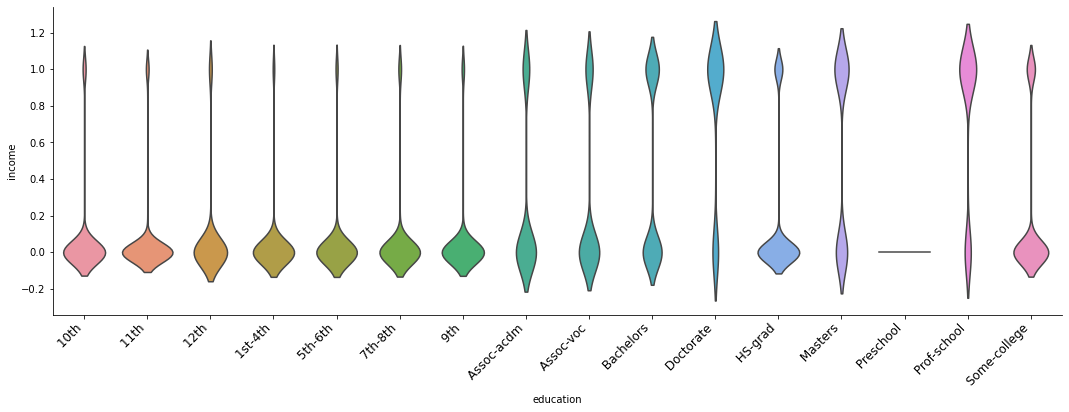

In [546]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='education', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Education level clearly seems to influence income group as lower education categories have lower income and viceversa

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

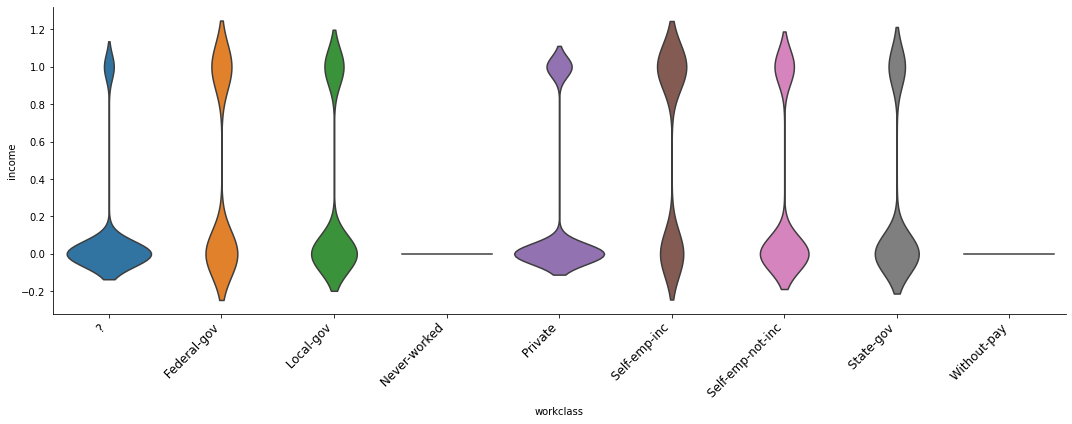

In [547]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='workclass', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Workclass does not seem to imact income group to a great extent

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

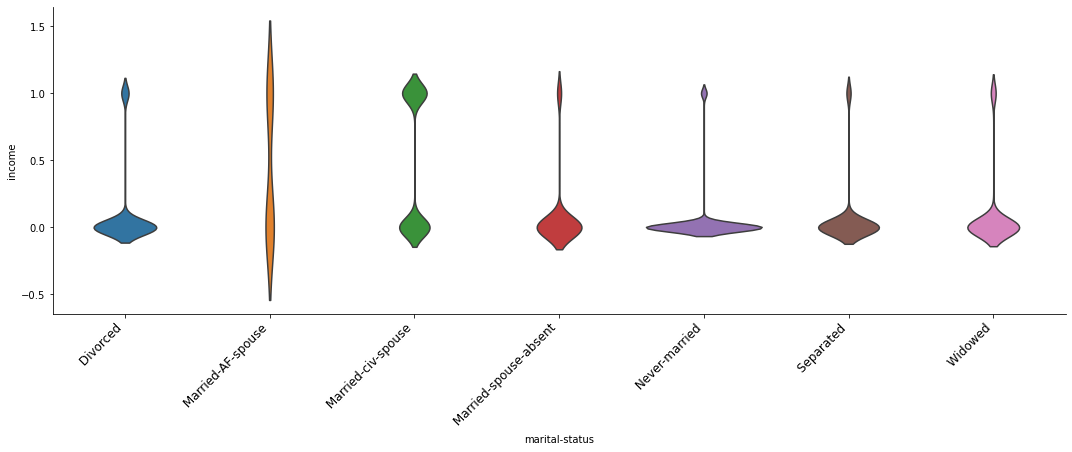

In [550]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='marital-status', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Marital-status does not seem to some impact on income group. Specifically 'Married with Civilian Spouse' group which clearly shows higher proportion of distribution in high income group. For rest of the categories, majority of the population lies in low income group.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

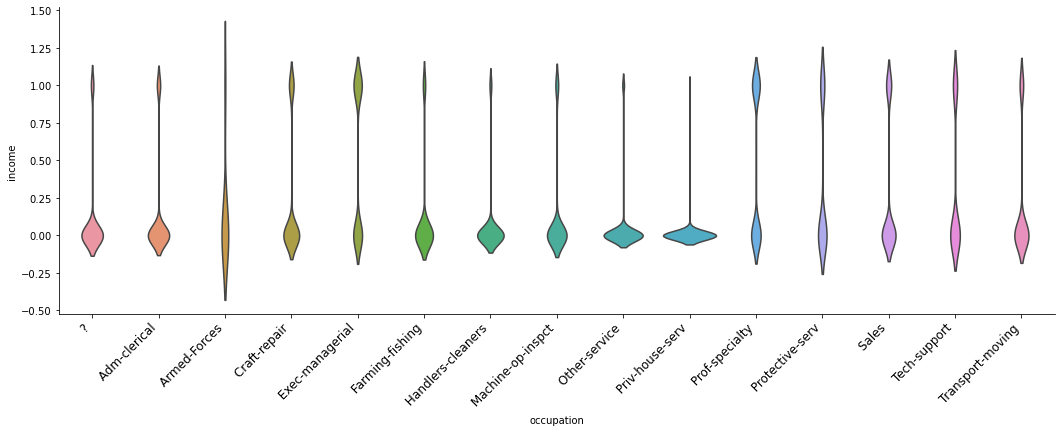

In [551]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='occupation', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Following occupation show more proportion people falling in high income group - prof-speaciality, protective services, Sales, Tech Support and Transport-moving

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

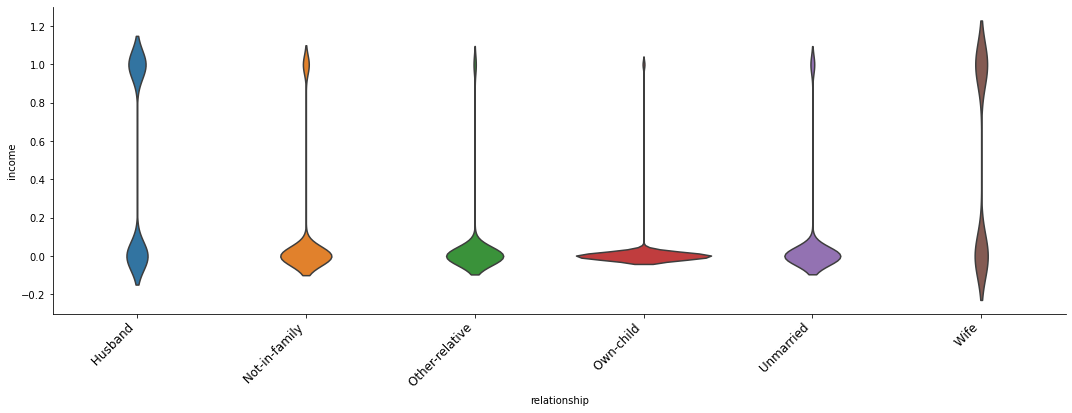

In [552]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='relationship', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Husband-Wife category expectedly have higher income (possibly because they makeup the married with civilian wife group which has higher income as per the earlier chart)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

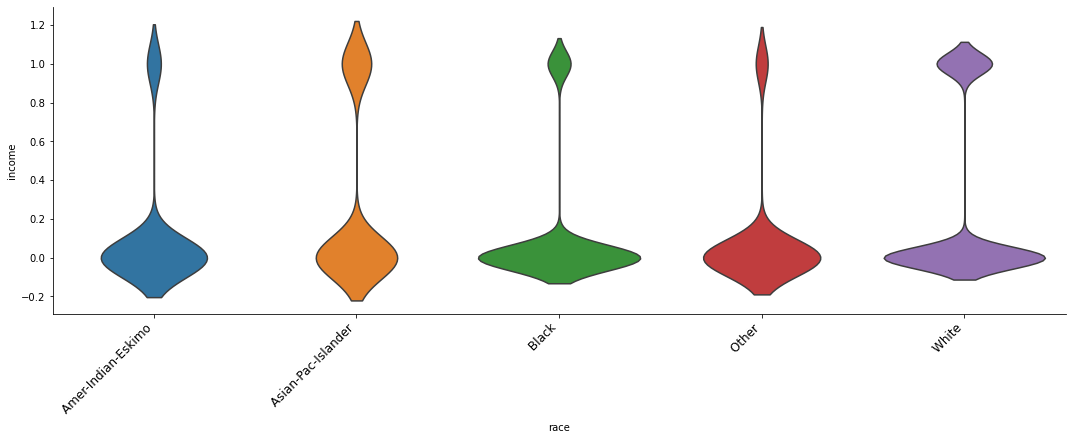

In [553]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='race', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### There is more representation of white and Asian Pacific Islander among high income group. Where all other races are more represented by lower income group

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

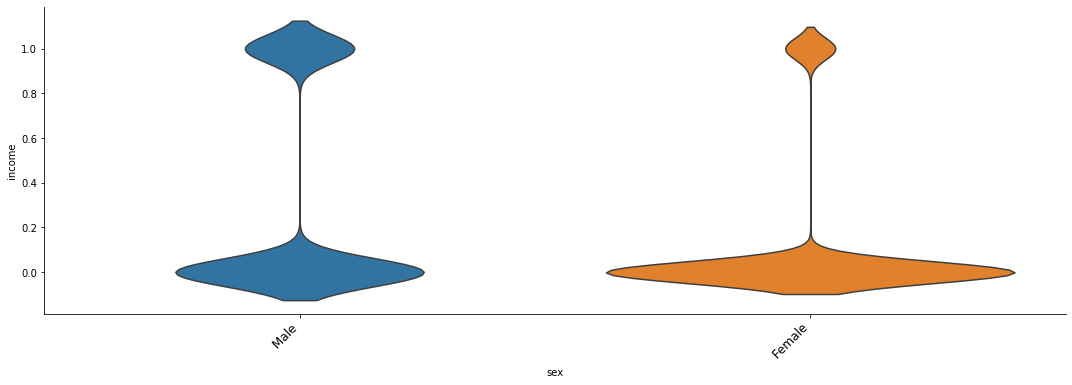

In [554]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='sex', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Females have a significantly lower representation in higher income group compared to Males

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

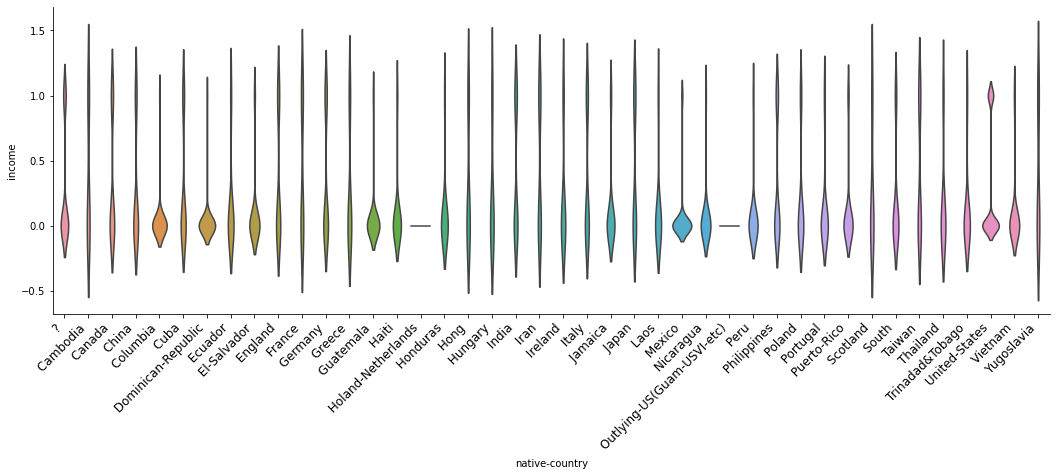

In [555]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='native-country', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Difficult to discern trend based on country of origin (possibly because of smaller samples). In case of people with non-US native country, proportion of lower income group population is possibly owing to their immigrant status (vs. people with US as native-country)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

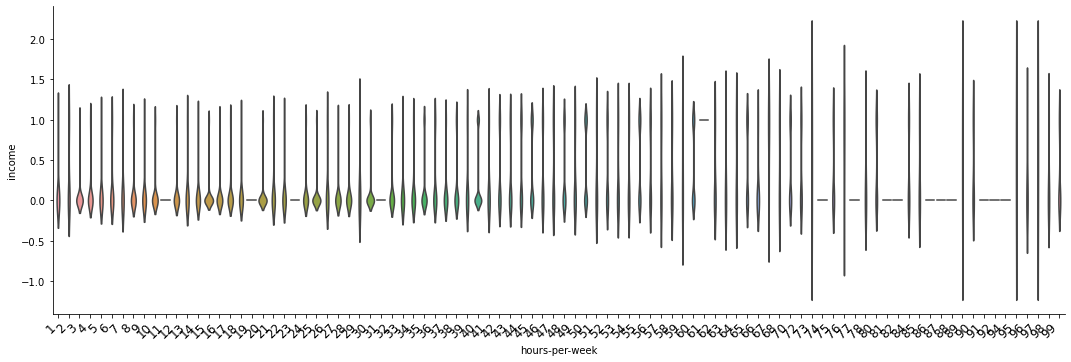

In [556]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='hours-per-week', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Hours per week category is difficult to interpret owning to thinky distributed data.